In [2]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image 
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris.data, iris.target , random_state = 1)

In [4]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

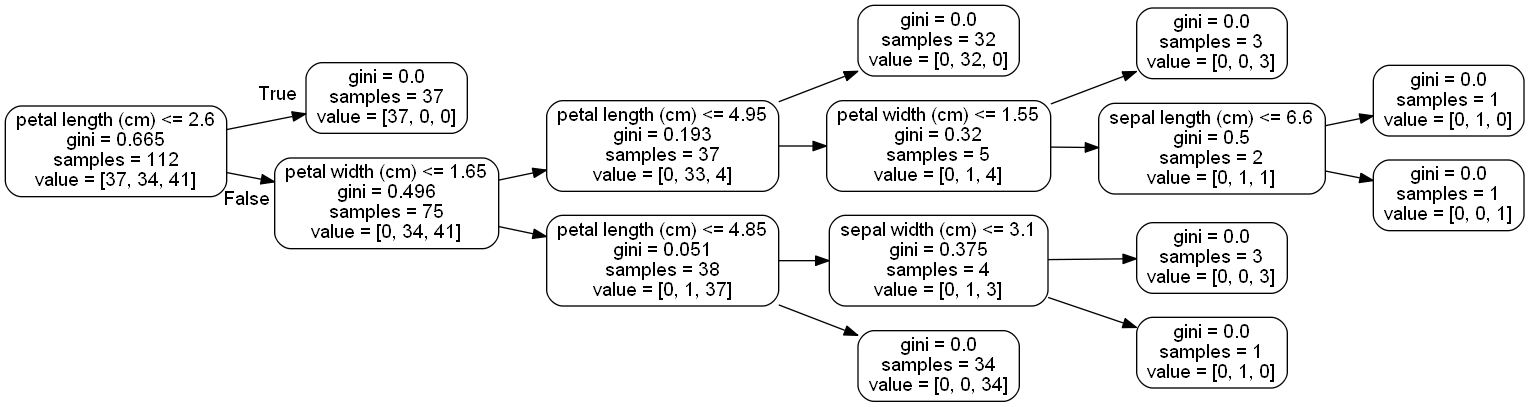

In [6]:
import pydotplus
dot_data = export_graphviz(clf , out_file=None ,rounded = True  ,feature_names = iris.feature_names,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#graphviz.Source(dot_graph)
#graph[0].write_pdf("iris.pdf")
#graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_pdf("iris.pdf")

In [5]:
y_train_pred =  clf.predict(x_train)
y_test_pred =  clf.predict(x_test)

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
confusion_matrix(y_train , y_train_pred)

array([[37,  0,  0],
       [ 0, 34,  0],
       [ 0,  0, 41]], dtype=int64)

In [1]:
confusion_matrix(y_test , y_test_pred)

NameError: name 'confusion_matrix' is not defined

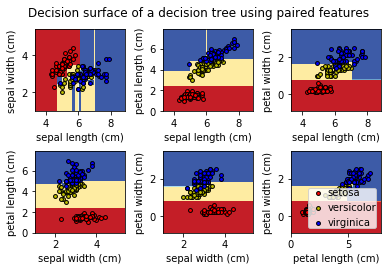

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()


In [10]:
	
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

 
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=17)
 
clf = tree.DecisionTreeClassifier(random_state=17)
clf = clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       0.96      0.93      0.94        27
  virginica       0.89      0.94      0.92        18

avg / total       0.95      0.95      0.95        60


Accuracy: 0.9500
